# Sandia 34-Meter Vertical Axis Wind Turbine

In this example, we examine the stability characteristics of the Sandia 34-Meter Vertical
Axis Wind Turbine (VAWT).  Geometry for this VAWT is described in
[SAND-91-2228](https://energy.sandia.gov/wp-content/gallery/uploads/SAND-91-2228.pdf)
and shown in the figure.  Sectional properties for this VAWT are derived from properties
listed in [SAND-88-1807](https://energy.sandia.gov/wp-content/gallery/uploads/SAND-88-1807.pdf)

The original authors of this example requested that the following citation accompany it.

Moore, K. and Ennis, B., “Aeroelastic Validation of the Offshore Wind Energy Simulator
for Vertical-Axis Wind Turbines”, forthcoming 2022

![](../assets/vawt-drawing.png)

In [1]:
using GXBeam, LinearAlgebra, FLOWMath

# --- Tower Definition --- #

tower_height = 41.9
tower_stiffness = Diagonal([8.4404e9, 2.7053e9, 2.7053e9, 7.0428e9, 9.4072e9, 9.4072e9])
tower_mass = Diagonal([330.755, 330.755, 330.755, 737.282, 368.641, 368.641])

# --- Blade Definition --- #

# geometry
blade_xyz = [
     0.0        0.0   0.0;
     2.26837    0.0   1.257;
     3.63183    0.0   2.095;
     6.76113    0.0   4.19;
     9.55882    0.0   6.285;
    11.8976     0.0   8.38;
    13.7306     0.0  10.475;
    15.1409     0.0  12.57;
    16.1228     0.0  14.665;
    16.7334     0.0  16.76;
    17.0133     0.0  18.855;
    17.0987     0.0  20.95;
    16.9615     0.0  23.045;
    16.5139     0.0  25.14;
    15.7435     0.0  27.235;
    14.5458     0.0  29.33;
    12.9287     0.0  31.425;
    10.8901     0.0  33.52;
     8.547      0.0  35.615;
     5.93739    0.0  37.71;
     3.05842    0.0  39.805;
     1.87486    0.0  40.643;
     0.0        0.0  41.9
]

# section boundaries (z-coordinate)
blade_transition = [0.0, 5.8, 11.1, 29.0, 34.7, 41.9]

# root section properties

blade_stiffness1 = [
    3.74563e9  0.0        0.0        0.0        0.0        1.14382e8;
    0.0        1.20052e9  0.0        0.0        0.0        0.0;
    0.0        0.0        1.20052e9  0.0        0.0        0.0;
    0.0        0.0        0.0        1.87992e7  0.0        0.0;
    0.0        0.0        0.0        0.0        2.24336e7  0.0;
    1.14382e8  0.0        0.0        0.0        0.0        4.09242e8;
]

blade_mass1 = [
    146.781     0.0       0.0      0.0     28.7783     0.0;
      0.0     146.781     0.0    -28.7783   0.0        0.0;
      0.0       0.0     146.781    0.0      0.0        0.0;
      0.0     -28.7783    0.0     16.7793   0.0        0.0;
     28.7783    0.0       0.0      0.0      0.879112  -0.0;
      0.0       0.0       0.0      0.0     -0.0       15.9002;
]

# transition section properties

blade_stiffness2 = [
    2.22783e9  0.0        0.0        0.0        0.0        4.20422e7;
    0.0        7.14048e8  0.0        0.0        0.0        0.0;
    0.0        0.0        7.14048e8  0.0        0.0        0.0;
    0.0        0.0        0.0        6.55493e6  0.0        0.0;
    0.0        0.0        0.0        0.0        7.35548e6  0.0;
    4.20422e7  0.0        0.0        0.0        0.0        1.84227e8;
]

blade_mass2 = [
    87.3025    0.0      0.0       0.0      16.7316     0.0;
     0.0      87.3025   0.0     -16.7316    0.0        0.0;
     0.0       0.0     87.3025   -0.0       0.0        0.0;
     0.0     -16.7316  -0.0       7.47649   0.0        0.0;
    16.7316    0.0      0.0       0.0       0.288241  -0.0;
     0.0       0.0      0.0       0.0      -0.0        7.18825;
]

# center section properties

blade_stiffness3 = [
    1.76888e9  0.0        0.0        0.0        0.0        2.34071e7;
    0.0        5.66947e8  0.0        0.0        0.0        0.0;
    0.0        0.0        5.66947e8  0.0        0.0        0.0;
    0.0        0.0        0.0        4.00804e6  0.0        0.0;
    0.0        0.0        0.0        0.0        4.34302e6  0.0;
    2.34071e7  0.0        0.0        0.0        0.0        1.09341e8;
]

blade_mass3 = [
    69.3173    0.0      0.0       0.0      11.5831     0.0;
     0.0      69.3173   0.0     -11.5831    0.0        0.0;
     0.0       0.0     69.3173   -0.0       0.0        0.0;
     0.0     -11.5831  -0.0       4.44282   0.0        0.0;
    11.5831    0.0      0.0       0.0       0.170191  -0.0;
     0.0       0.0      0.0       0.0      -0.0        4.27263;
]

# --- Strut Definition --- #

strut_locations = [1.257, 40.643]
strut_stiffness = blade_stiffness1
strut_mass = blade_mass1

# --- Define Assembly --- #

# Tower

# number of tower sections
nt = 22

# tower points
x = zeros(nt+1)
y = zeros(nt+1)
z = vcat(0, range(strut_locations[1], strut_locations[2]; length=nt-1), tower_height)
pt_t = [[x[i],y[i],z[i]] for i = 1:nt+1]

# tower frame of reference
frame_t = fill([0 0 1; 0 1 0; -1 0 0], nt)

# tower stiffness
stiff_t = fill(tower_stiffness, nt)

# tower mass
mass_t = fill(tower_mass, nt)

# Blades

# number of blade sections
nbr = 4 # root
nbt = 3 # transition
nbc = 8 # center
nb = 2*nbr + 2*nbt + nbc # total number of blade sections

# interpolation parameter coordinates
new_z = vcat(0.0,
    range(strut_locations[1], 5.8, length=nbr)[1:end-1],
    range(5.8, 11.1, length=nbt+1)[1:end-1],
    range(11.1, 29.0, length=nbc+1)[1:end-1],
    range(29.0, 34.7, length=nbt+1)[1:end-1],
    range(34.7, strut_locations[2], length=nbr),
    tower_height)

# blade points
x = FLOWMath.akima(blade_xyz[:,3], blade_xyz[:,1], new_z)
y = zero(new_z)
z = new_z
pt_bl = [[-x[i],y[i],z[i]] for i = 1:nb+1] # left blade
pt_br = [[x[i],y[i],z[i]] for i = 1:nb+1] # right blade

# left blade frame of reference
frame_bl = Vector{Matrix{Float64}}(undef, nb)
for i = 1:nb
    r = pt_bl[i+1] - pt_bl[i]
    n = norm(r)
    s = r[3]/n
    c = r[1]/n
    frame_bl[i] = [c 0 -s; 0 1 0; s 0 c]
end

# right blade frame of reference
frame_br = Vector{Matrix{Float64}}(undef, nb)
for i = 1:nb
    r = pt_br[i+1] - pt_br[i]
    n = norm(r)
    s = r[3]/n
    c = r[1]/n
    frame_br[i] = [c 0 -s; 0 1 0; s 0 c]
end

# blade stiffness
stiff_b = vcat(
    fill(blade_stiffness1, nbr),
    fill(blade_stiffness2, nbt),
    fill(blade_stiffness3, nbc),
    fill(blade_stiffness2, nbt),
    fill(blade_stiffness1, nbr)
)

# blade mass
mass_b = vcat(
    fill(blade_mass1, nbr),
    fill(blade_mass2, nbt),
    fill(blade_mass3, nbc),
    fill(blade_mass2, nbt),
    fill(blade_mass1, nbr)
)

# Struts

# number of strut sections per strut
ns = 3

# lower left strut points
x = range(0.0, pt_bl[2][1]; length=ns+1)
y = zeros(ns+1)
z = fill(strut_locations[1], ns+1)
pt_s1 = [[x[i],y[i],z[i]] for i = 1:ns+1]

# lower right strut points
x = range(0.0, pt_br[2][1]; length=ns+1)
y = zeros(ns+1)
z = fill(strut_locations[1], ns+1)
pt_s2 = [[x[i],y[i],z[i]] for i = 1:ns+1]

# upper left strut points
x = range(0.0, pt_bl[end-1][1]; length=ns+1)
y = zeros(ns+1)
z = fill(strut_locations[2], ns+1)
pt_s3 = [[x[i],y[i],z[i]] for i = 1:ns+1]

# upper right strut points
x = range(0.0, pt_br[end-1][1]; length=ns+1)
y = zeros(ns+1)
z = fill(strut_locations[2], ns+1)
pt_s4 = [[x[i],y[i],z[i]] for i = 1:ns+1]

# strut frame of reference
frame_s = fill([1 0 0; 0 1 0; 0 0 1], ns)

# strut stiffness
stiff_s = fill(strut_stiffness, ns)

# strut mass
mass_s = fill(strut_mass, ns)

# Combine Tower, Blades, and Struts

# combine points
points = vcat(pt_t, pt_bl, pt_br, pt_s1, pt_s2, pt_s3, pt_s4)

# define element connectivity
istart = cumsum([1, nt+1, nb+1, nb+1, ns+1, ns+1, ns+1])
istop = cumsum([nt+1, nb+1, nb+1, ns+1, ns+1, ns+1, ns+1])
start = vcat([istart[i]:istop[i]-1 for i = 1:length(istart)]...)
stop = vcat([istart[i]+1:istop[i] for i = 1:length(istart)]...)

# use zero-length elements as joints

nj = 12 # number of joints

joints = [
    istart[1]     istart[2]; # tower - bottom of left blade
    istart[1]     istart[3]; # tower - bottom of right blade
    istart[1]+1   istart[4]; # tower - lower left strut
    istart[1]+1   istart[5]; # tower - lower right strut
    istop[1]-1    istart[6]; # tower - upper left strut
    istop[1]-1    istart[7]; # tower - upper right strut
    istop[2]      istop[1]; # top of left blade - tower
    istop[3]      istop[1]; # top of right blade - tower
    istop[4]      istart[2]+1; # lower left strut - left blade
    istop[5]      istart[3]+1; # lower right strut - right blade
    istop[6]      istop[2]-1; # upper left strut - left blade
    istop[7]      istop[3]-1; # upper right strut - right blade
]

frame_j = fill([1 0 0; 0 1 0; 0 0 1], nj)

stiff_j = fill(zeros(6,6), nj) # will be modeled as infinitely stiff

mass_j = fill(zeros(6,6), nj)

# add joint connectivity
start = vcat(start, joints[:,1])
stop = vcat(stop, joints[:,2])

# combine frames
frames = vcat(frame_t, frame_bl, frame_br, frame_s, frame_s, frame_s, frame_s, frame_j)

# combine stiffness
stiffness = vcat(stiff_t, stiff_b, stiff_b, stiff_s, stiff_s, stiff_s, stiff_s, stiff_j)

# combine mass
mass = vcat(mass_t, mass_b, mass_b, mass_s, mass_s, mass_s, mass_s, mass_j)

# create assembly
assembly = Assembly(points, start, stop;
    frames=frames,
    stiffness=stiffness,
    mass=mass)

# --- Define Prescribed Conditions --- #

# create dictionary of prescribed conditions
prescribed_conditions = Dict(
    # fixed base
    1 => PrescribedConditions(ux=0, uy=0, uz=0, theta_x=0, theta_y=0, theta_z=0),
    # fixed top, but free to rotate around z-axis
    istop[1] => PrescribedConditions(ux=0, uy=0, uz=0, theta_x=0, theta_y=0),
)

# --- Perform Analysis --- #

# revolutions per minute
rpm = 0:1:40

# gravity vector
gravity = [0, 0, -9.81]

# number of modes
nmode = 10

# number of eigenvalues
nev = 2*nmode

# initialize system storage
system = DynamicSystem(assembly)

# storage for results
freq = zeros(length(rpm), nmode)

# perform an analysis for each rotation rate
for (i,rpm) in enumerate(rpm)

    global system, Up

    # set turbine rotation
    angular_velocity = [0, 0, rpm*(2*pi)/60]

    # eigenvalues and (right) eigenvectors
    system, λ, V, converged = eigenvalue_analysis!(system, assembly;
        prescribed_conditions = prescribed_conditions,
        angular_velocity = angular_velocity,
        gravity = gravity,
        nev = nev
        )

    # check convergence
    @assert converged

    if i > 1
        # construct correlation matrix
        C = Up*system.M*V

        # correlate eigenmodes
        perm, corruption = correlate_eigenmodes(C)

        # re-arrange eigenvalues
        λ = λ[perm]

        # update left eigenvector matrix
        Up = left_eigenvectors(system, λ, V)
        Up = Up[perm,:]
    else
        # update left eigenvector matrix
        Up = left_eigenvectors(system, λ, V)
    end

    # save frequencies
    freq[i,:] = [imag(λ[k])/(2*pi) for k = 1:2:nev]

end

We can compare the computed mode frequencies with experimental data taken from
[SAND-91-2228](https://energy.sandia.gov/wp-content/gallery/uploads/SAND-91-2228.pdf).

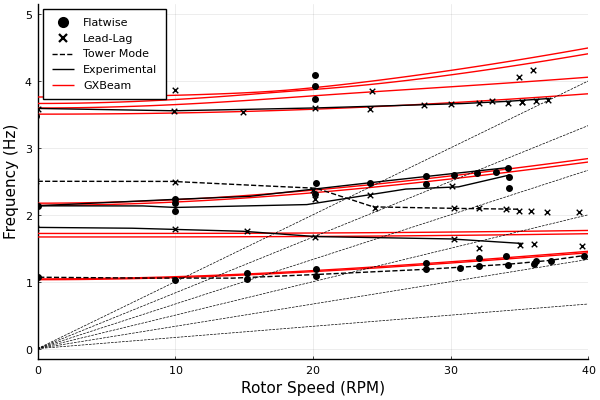

In [2]:
using Plots
pyplot()


# Experimental Data
SNL34_flap = [
    -0.11236  3.4778;
    20.1124   4.08516;
    20.1124   3.92961;
    20.1124   3.72961;
    20.2247   2.47403;
    24.1573   2.4733;
    28.2022   2.57256;
    30.2247   2.5944;
    31.9101   2.62742;
    33.2584   2.63829;
    34.1573   2.70479;
    34.2697   2.57143;
    34.2697   2.40476;
    28.2022   2.46144;
    20.1124   2.30739;
    10.0      2.23148;
    10.0      2.17593;
    10.0      2.0537;
    39.6629   1.38154;
    37.3034   1.31531;
    36.0674   1.25999;
    36.1798   1.31552;
    34.1573   1.24923;
    32.0225   1.23851;
    30.6742   1.20543;
    28.2022   1.18367;
    20.2247   1.08514;
    20.2247   1.18514;
    28.2022   1.27256;
    32.0225   1.34963;
    34.0449   1.38258;
    15.1685   1.13052;
    15.1685   1.04164;
    10.0      1.03148;
     0.0      1.06667;
     0.0      2.13333;
]

SNL34_lead = [
     0.0      3.57778;
    -0.11236  2.51113;
    -0.11236  1.80002;
    10.0      1.78704;
    15.1685   1.75275;
    20.1124   1.67405;
    30.2247   1.63885;
    32.0225   1.50518;
    35.0562   1.54906;
    36.0674   1.55999;
    39.5506   1.52601;
    39.3258   2.04827;
    36.9663   2.0376;
    35.8427   2.04892;
    34.9438   2.0602;
    34.0449   2.08258;
    32.0225   2.09407;
    30.2247   2.10551;
    24.4944   2.09546;
    30.1124   2.42776;
    24.1573   2.29553;
    20.1124   2.22961;
    20.0      2.37407;
    10.0      2.48704;
     9.88764  3.55372;
    14.9438   3.54168;
    10.0      3.86481;
    20.1124   3.59628;
    24.1573   3.58442;
    24.2697   3.85106;
    28.0899   3.63924;
    30.0      3.66111;
    32.0225   3.67185;
    33.0337   3.69388;
    34.1573   3.67145;
    35.1685   3.68238;
    35.1685   3.68238;
    36.1798   3.6933;
    37.0787   3.71536;
    34.9438   4.0602;
    35.9551   4.16001;
]

SNL34_1F = [
     0.11236  1.06665;
     7.19101  1.05422;
    14.1573   1.05293;
    20.2247   1.10737;
    28.0899   1.18369;
    34.1573   1.26034;
    37.0787   1.31536;
    39.7753   1.39263;
]

SNL34_1BE = [
     0.0      1.81111;
     6.85393  1.79873;
    14.9438   1.75279;
    20.2247   1.67403;
    30.0      1.63889;
    35.1685   1.57127;
]

SNL34_2FA = [
    -0.11236  2.13335;
     7.64045  2.13192;
    10.0      2.10926;
    19.5506   2.15194;
    26.7416   2.38394;
    30.5618   2.41656;
    34.2697   2.59365;
]

SNL34_2FS = [
    -0.11236  2.13335;
    10.1124   2.23146;
    15.3933   2.27493;
    26.2921   2.52846;
    34.1573   2.70479;
]

SNL34_1TO = [
     0.0      2.5;
     4.04494  2.49925;
     9.77528  2.49819;
    16.6292   2.43025;
    20.2247   2.39625;
    24.382    2.11771;
    30.6742   2.09432;
    35.0562   2.0824;
]

SNL34_3F = [
    -0.11236  3.58891;
     9.88764  3.55372;
    15.1685   3.57497;
    20.2247   3.59625;
    25.5056   3.62861;
    30.7865   3.66097;
    34.0449   3.6937;
    37.191    3.73756;
]

# Initialize Plot
plot(
    xlabel="Rotor Speed (RPM)",
    ylabel="Frequency (Hz)",
    xlim = (0, 40.0),
    legend = :topleft,
    grid=true)

# Add computational results
for i=1:1:nmode
    plot!(rpm, freq[:,i], color=:red, linestyle=:solid, label="")
end

# Add experimental results
scatter!(SNL34_flap[:,1],SNL34_flap[:,2], color=:black, markerstyle=:dot, label="Flatwise")
scatter!(SNL34_lead[:,1],SNL34_lead[:,2], color=:black, markershape=:x, label="Lead-Lag")
plot!(SNL34_1F[:,1], SNL34_1F[:,2], color=:black, linestyle=:dash, label="")
plot!(SNL34_1BE[:,1], SNL34_1BE[:,2], color=:black, linestyle=:solid, label="")
plot!(SNL34_2FA[:,1], SNL34_2FA[:,2], color=:black, linestyle=:solid, label="")
plot!(SNL34_2FS[:,1], SNL34_2FS[:,2], color=:black, linestyle=:solid, label="")
plot!(SNL34_1TO[:,1], SNL34_1TO[:,2], color=:black, linestyle=:dash, label="Tower Mode")
plot!(SNL34_3F[:,1], SNL34_3F[:,2], color=:black, linestyle=:solid, label="")

# Add per-revolution lines
for i = 1:6
    lx = [rpm[1], rpm[end]+10]
    ly = [rpm[1], rpm[end]+10].*i./60.0
    plot!(lx, ly, color=:black, linestyle=:dash, linewidth=0.5, label="")
    annotate!(0.95*lx[2], ly[2]+.05+(i-1)*.01, text("$i P", 10))
end

# Add legend entries
plot!([0], [0], color=:black, label="Experimental")
plot!([0], [0], color=:red, label="GXBeam")

As can be seen, there is good agreement between the computational and experimental
results.

In [3]:
state = AssemblyState(system, assembly; prescribed_conditions=prescribed_conditions)

mkpath("vawt-simulation")
write_vtk("vawt-simulation/vawt-simulation", assembly, state)

![](../assets/vawt-simulation.gif)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*